### BASIC STATISTICS AND LOADING DATA 

In [1]:
data = []
with open("Sentences.txt", "r") as file:
    for line in file:
        if '@' in line:
            # Split by the last occurrence of '@|' to get sentence and label
            sentence, label = line.rsplit('@', 1)  
            sentence = sentence.strip()  # Remove any leading/trailing whitespace
            label = label.strip()  # Remove any leading/trailing whitespace

            # Verify label correctness
            if label in ["positive", "neutral", "negative"]:
                data.append((sentence, label))
            else:
                print(f"Warning: Unrecognized label '{label}' in line: {line}")



# Separate sentences (X) and labels (y)
x = [item[0] for item in data]  # List of sentences
y = [item[1] for item in data]  # List of labels

# Map string labels to integers
label_mapping = {"positive": 2, "neutral": 1, "negative": 0}
y = [label_mapping[label] for label in y]

# Split into train, validation, and test sets
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

# Convert to Pandas DataFrames for compatibility with Hugging Face's Dataset
import pandas as pd

train_df = pd.DataFrame({'text': X_train, 'label': y_train})
val_df = pd.DataFrame({'text': X_val, 'label': y_val})
test_df = pd.DataFrame({'text': X_test, 'label': y_test})

# Sample print to confirm successful splitting
print(f"Training set: {len(train_df)}, Validation set: {len(val_df)}, Test set: {len(test_df)}")

Training set: 3392, Validation set: 727, Test set: 727


In [2]:
data

[('According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .',
  'neutral'),
 ('Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .',
  'neutral'),
 ('The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .',
  'negative'),
 ('With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .',
  'positive'),
 ("According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating pro

In [3]:
len(x)

4846

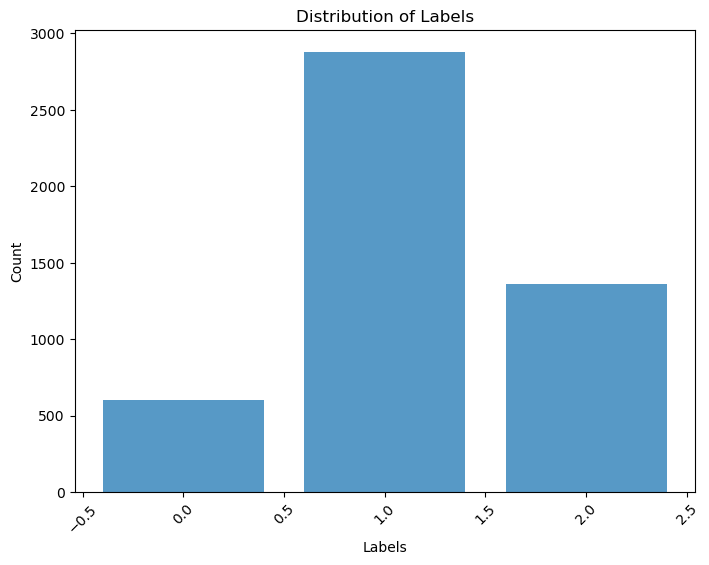

In [4]:
from collections import Counter
import matplotlib.pyplot as plt

# Count the distribution of labels
label_counts = Counter(y)

# Convert to lists for plotting
label_names = list(label_counts.keys())
label_values = list(label_counts.values())

# Plot the label distribution
plt.figure(figsize=(8, 6))
plt.bar(label_names, label_values, alpha=0.75)
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [5]:
from collections import Counter
from nltk.corpus import stopwords
from collections import Counter
import re

# Ensure stopwords are downloaded
import nltk
nltk.download('stopwords')
all_text = " ".join(x)

# Step 2: Tokenize words (basic splitting by spaces and removing punctuation)
tokens = re.findall(r'\b\w+\b', all_text.lower())

# Step 3: Count unique words (Vocabulary size)
vocab = set(tokens)
vocab_size = len(vocab)

# Step 4: Count total words
total_words = len(tokens)

# Step 5: Get the most common words
word_counts = Counter(tokens)
most_common_words = word_counts.most_common(10)

# Print the results
print(f"Total Vocabulary Size: {vocab_size}")
print(f"Total Number of Words: {total_words}")
print("Most Common Words:")
for word, count in most_common_words:
    print(f"{word}: {count}")

Total Vocabulary Size: 10114
Total Number of Words: 103247
Most Common Words:
the: 6069
of: 3215
in: 2984
and: 2596
to: 2523
a: 1748
for: 1152
s: 1089
eur: 1017
is: 930


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\josh9\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
stop_words = set(stopwords.words('english'))  # You can add custom stop words to this set
filtered_tokens = [word for word in tokens if word not in stop_words]
vocab = set(filtered_tokens)
vocab_size = len(vocab)

# Step 4: Count total words after removing stop words
total_filtered_words = len(filtered_tokens)

# Step 5: Get the most common words
word_counts = Counter(filtered_tokens)
most_common_words = word_counts.most_common(10)

# Print the results
print(f"Total Vocabulary Size (without stop words): {vocab_size}")
print(f"Total Number of Words (without stop words): {total_filtered_words}")
print("Most Common Words (without stop words):")
for word, count in most_common_words:
    print(f"{word}: {count}")

Total Vocabulary Size (without stop words): 9989
Total Number of Words (without stop words): 67579
Most Common Words (without stop words):
eur: 1017
company: 851
said: 545
finnish: 524
mn: 515
1: 484
sales: 455
million: 440
net: 413
profit: 410


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

#### Note: This code was not used in the report

In [8]:
# Step 3: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Optional to limit features for efficiency
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 4: Train Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_tfidf, y_train)

# Step 5: Evaluate on Validation Set
y_val_pred = lr_model.predict(X_val_tfidf)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}")
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Step 6: Evaluate on Test Set
y_test_pred = lr_model.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

Validation Accuracy: 0.74
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.33      0.45        90
           1       0.74      0.96      0.83       432
           2       0.77      0.46      0.58       205

    accuracy                           0.74       727
   macro avg       0.74      0.58      0.62       727
weighted avg       0.74      0.74      0.71       727

Test Accuracy: 0.72
Test Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.38      0.50        91
           1       0.74      0.92      0.82       432
           2       0.64      0.43      0.51       204

    accuracy                           0.72       727
   macro avg       0.70      0.58      0.61       727
weighted avg       0.71      0.72      0.69       727



### FINE TUNING FINBERT

In [77]:
import pandas as pd
from datasets import Dataset
from transformers import BertTokenizer, Trainer, BertForSequenceClassification, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import torch

In [78]:
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

In [79]:
# Load FinBERT
model_name = "yiyanghkust/finbert-tone"
model = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

C:\Users\josh9\anaconda3\envs\zanis\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [80]:
def tokenize_data(batch):
    return tokenizer(batch['text'], padding=True, truncation=True, max_length=512)

train_dataset = train_dataset.map(tokenize_data, batched=True)
val_dataset = val_dataset.map(tokenize_data, batched=True)
test_dataset = test_dataset.map(tokenize_data, batched=True)

Map:   0%|          | 0/3392 [00:00<?, ? examples/s]

Map:   0%|          | 0/727 [00:00<?, ? examples/s]

Map:   0%|          | 0/727 [00:00<?, ? examples/s]

In [81]:
train_dataset = train_dataset.with_format("torch")
val_dataset = val_dataset.with_format("torch")
test_dataset = test_dataset.with_format("torch")

In [82]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

In [83]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report


#### Default BERT Evaluation

In [84]:
training_args = TrainingArguments(
    output_dir='./results',     
    per_device_eval_batch_size=16,  
    logging_dir='./logs',       
)

trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics
)

# Run Evaluation on the Test Dataset
test_results = trainer.predict(test_dataset)
print("Test Results:", test_results.metrics)

# Extract predictions and true labels
y_pred = np.argmax(test_results.predictions, axis=1)
y_true = test_results.label_ids

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred))

Test Results: {'test_loss': 11.502243041992188, 'test_accuracy': 0.07427785419532325, 'test_precision': 0.13626186714806507, 'test_recall': 0.07427785419532325, 'test_f1': 0.07239749645998657, 'test_runtime': 1.359, 'test_samples_per_second': 534.936, 'test_steps_per_second': 33.847}
Confusion Matrix:
[[ 24   2  65]
 [398  23  11]
 [ 94 103   7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.05      0.26      0.08        91
           1       0.18      0.05      0.08       432
           2       0.08      0.03      0.05       204

    accuracy                           0.07       727
   macro avg       0.10      0.12      0.07       727
weighted avg       0.14      0.07      0.07       727



#### Finetune FinBERT

In [85]:
# Training Arguments
training_args = TrainingArguments(
    output_dir="./finbert-finetuned",
    evaluation_strategy="epoch",            
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=4,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    load_best_model_at_end=True,            
    metric_for_best_model="accuracy",             
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

In [86]:
import time
# Train the Model (Fine-Tuning)
start_time = time.time()
trainer.train()
end_time = time.time()
# Save the Model
model.save_pretrained("./finbert-finetuned")
tokenizer.save_pretrained("./finbert-finetuned")

# Evaluate on Validation Set
val_results = trainer.evaluate(eval_dataset=val_dataset)
print("Validation Results:", val_results)

# Evaluate on Test Set
test_results = trainer.evaluate(eval_dataset=test_dataset)
print("Test Results:", test_results)

training_duration = end_time - start_time
print(f"Training took {training_duration // 60:.0f} minutes and {training_duration % 60:.2f} seconds.")

C:\Users\josh9\anaconda3\envs\zanis\Lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.468700,0.562937,0.797799,0.817217,0.797799,0.788561
2,0.205600,0.449065,0.844567,0.845806,0.844567,0.844370
3,0.115900,0.594294,0.848693,0.848761,0.848693,0.848396
4,0.088100,0.653513,0.840440,0.841691,0.840440,0.840914


Validation Results: {'eval_loss': 0.5942937731742859, 'eval_accuracy': 0.8486932599724897, 'eval_precision': 0.8487613999449168, 'eval_recall': 0.8486932599724897, 'eval_f1': 0.84839609178236, 'eval_runtime': 2.3048, 'eval_samples_per_second': 315.433, 'eval_steps_per_second': 19.959, 'epoch': 4.0}
Test Results: {'eval_loss': 0.6290901899337769, 'eval_accuracy': 0.8514442916093535, 'eval_precision': 0.8524334790520316, 'eval_recall': 0.8514442916093535, 'eval_f1': 0.8507995893718566, 'eval_runtime': 1.3038, 'eval_samples_per_second': 557.586, 'eval_steps_per_second': 35.281, 'epoch': 4.0}
Training took 2 minutes and 20.97 seconds.


In [87]:
val_results = trainer.evaluate(eval_dataset=val_dataset)
print("Validation Results:", val_results)

# Evaluate on Test Set to get predictions
test_results = trainer.predict(test_dataset)
print("Test Results:", test_results.metrics)

Validation Results: {'eval_loss': 0.5942937731742859, 'eval_accuracy': 0.8486932599724897, 'eval_precision': 0.8487613999449168, 'eval_recall': 0.8486932599724897, 'eval_f1': 0.84839609178236, 'eval_runtime': 2.304, 'eval_samples_per_second': 315.543, 'eval_steps_per_second': 19.966, 'epoch': 4.0}
Test Results: {'test_loss': 0.6290901899337769, 'test_accuracy': 0.8514442916093535, 'test_precision': 0.8524334790520316, 'test_recall': 0.8514442916093535, 'test_f1': 0.8507995893718566, 'test_runtime': 1.2875, 'test_samples_per_second': 564.65, 'test_steps_per_second': 35.727}


In [23]:
import os

In [24]:
y_pred = np.argmax(test_results.predictions, axis=1)
y_true = test_results.label_ids


# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, you can also print a classification report for more metrics
print("Classification Report:")
print(classification_report(y_true, y_pred))

Confusion Matrix:
[[ 81   7   3]
 [ 18 385  29]
 [  7  44 153]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        91
           1       0.88      0.89      0.89       432
           2       0.83      0.75      0.79       204

    accuracy                           0.85       727
   macro avg       0.82      0.84      0.83       727
weighted avg       0.85      0.85      0.85       727



In [22]:
### adding y_pred to test_df for error analysis

In [29]:
test_df['finetune_results'] = y_pred

### In Context Learning

In [9]:
from transformers import AutoModelForCausalLM, AutoTokenizer

In [1]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

# Load LLama2 model using transformers library
def load_llama2_model(token="token here"):
    tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-2-7b-chat-hf", use_auth_token=token)
    model = AutoModelForCausalLM.from_pretrained("meta-llama/Llama-2-7b-chat-hf", use_auth_token=token, torch_dtype=torch.float16)
    model.to('cuda')
    return tokenizer, model

tokenizer, model = load_llama2_model()


C:\Users\josh9\anaconda3\envs\zanis\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
C:\Users\josh9\anaconda3\envs\zanis\Lib\site-packages\transformers\tokenization_utils_base.py:1714: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
C:\Users\josh9\anaconda3\envs\zanis\Lib\site-packages\transformers\modeling_utils.py:2193: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

C:\Users\josh9\anaconda3\envs\zanis\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [12]:
def in_context_learning_sentiment_llama2(text):
    # Define a prompt with labeled examples for sentiment analysis
    prompt = f"Classify the sentiment of the following text as Positive, Negative, or Neutral:\n\"{text}\"\nSentiment:"


    # Tokenize the input prompt
    inputs = tokenizer(prompt, return_tensors="pt")
    inputs = {key: value.to('cuda') for key, value in inputs.items()}

    # Generate the response using the Llama2 model
    with torch.no_grad():
        outputs = model.generate(**inputs, max_length=100, do_sample=True, top_k=50)

    # Decode and return the generated sentiment
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    sentiment = response.split("Sentiment:")[-1].strip()
    return sentiment

# testing 
text = "I had an ok time at the event!"
sentiment = in_context_learning_sentiment_llama2(text)
print(sentiment)

Neutral


In [16]:
import json

def zero_shot_sentiment_analysis(sentences, batch_size=10):
    results = []
    
    for i in range(0, len(sentences), batch_size):
        batch = sentences[i:i + batch_size]
        
        for text in batch:
            try:
                prompt = f"Classify the sentiment of the following financial text as Positive, Negative, or Neutral:\n\"{text}\"\nSentiment:"

                inputs = tokenizer(prompt, return_tensors="pt")
                inputs = {key: value.to('cuda') for key, value in inputs.items()}

                with torch.no_grad():
                    outputs = model.generate(**inputs, max_length=100, do_sample=False, top_k=50)

                response = tokenizer.decode(outputs[0], skip_special_tokens=True)
                sentiment = response.split("Sentiment:")[-1].strip()
                results.append({"text": text, "sentiment": sentiment})

            except RuntimeError as e:
                if 'CUDA out of memory' in str(e):
                    print("CUDA memory overflow detected. Clearing cache...")
                    torch.cuda.empty_cache()
                    continue
                else:
                    raise e

        # Print progress and save intermediate results
        print(f"Processed batch {i // batch_size + 1}/{(len(sentences) // batch_size) + 1}")

        # Save intermediate results to avoid loss in case of interruption
        with open("sentiment_results.json", "w") as f:
            json.dump(results, f, indent=4)
        
        # Clear CUDA cache to free up memory after each batch
        torch.cuda.empty_cache()

    return results

sentences = list(test_df['text'])

sentiment_results = zero_shot_sentiment_analysis(sentences, batch_size=10)

# Save the final results
with open("final_sentiment_results.json", "w") as f:
    json.dump(sentiment_results, f, indent=4)


Processed batch 1/73
Processed batch 2/73
Processed batch 3/73


Input length of input_ids is 106, but `max_length` is set to 100. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Processed batch 4/73
Processed batch 5/73
Processed batch 6/73
Processed batch 7/73
Processed batch 8/73
Processed batch 9/73


Input length of input_ids is 111, but `max_length` is set to 100. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Processed batch 10/73
Processed batch 11/73
Processed batch 12/73
Processed batch 13/73
Processed batch 14/73
Processed batch 15/73


Input length of input_ids is 105, but `max_length` is set to 100. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Processed batch 16/73


Input length of input_ids is 101, but `max_length` is set to 100. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Processed batch 17/73
Processed batch 18/73
Processed batch 19/73


Input length of input_ids is 101, but `max_length` is set to 100. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Processed batch 20/73
Processed batch 21/73


Input length of input_ids is 102, but `max_length` is set to 100. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
Input length of input_ids is 101, but `max_length` is set to 100. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Processed batch 22/73
Processed batch 23/73
Processed batch 24/73
Processed batch 25/73
Processed batch 26/73


Input length of input_ids is 102, but `max_length` is set to 100. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Processed batch 27/73
Processed batch 28/73
Processed batch 29/73


Input length of input_ids is 100, but `max_length` is set to 100. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
Input length of input_ids is 102, but `max_length` is set to 100. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Processed batch 30/73
Processed batch 31/73
Processed batch 32/73
Processed batch 33/73


Input length of input_ids is 117, but `max_length` is set to 100. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Processed batch 34/73
Processed batch 35/73
Processed batch 36/73


Input length of input_ids is 104, but `max_length` is set to 100. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Processed batch 37/73
Processed batch 38/73
Processed batch 39/73


Input length of input_ids is 102, but `max_length` is set to 100. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Processed batch 40/73


Input length of input_ids is 107, but `max_length` is set to 100. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
Input length of input_ids is 105, but `max_length` is set to 100. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
Input length of input_ids is 123, but `max_length` is set to 100. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Processed batch 41/73
Processed batch 42/73
Processed batch 43/73


Input length of input_ids is 116, but `max_length` is set to 100. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Processed batch 44/73
Processed batch 45/73
Processed batch 46/73
Processed batch 47/73
Processed batch 48/73
Processed batch 49/73
Processed batch 50/73


Input length of input_ids is 111, but `max_length` is set to 100. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Processed batch 51/73


Input length of input_ids is 101, but `max_length` is set to 100. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
Input length of input_ids is 118, but `max_length` is set to 100. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Processed batch 52/73


Input length of input_ids is 105, but `max_length` is set to 100. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Processed batch 53/73
Processed batch 54/73
Processed batch 55/73
Processed batch 56/73
Processed batch 57/73
Processed batch 58/73


Input length of input_ids is 105, but `max_length` is set to 100. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
Input length of input_ids is 115, but `max_length` is set to 100. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Processed batch 59/73
Processed batch 60/73
Processed batch 61/73


Input length of input_ids is 108, but `max_length` is set to 100. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Processed batch 62/73
Processed batch 63/73
Processed batch 64/73
Processed batch 65/73
Processed batch 66/73


Input length of input_ids is 101, but `max_length` is set to 100. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Processed batch 67/73


Input length of input_ids is 103, but `max_length` is set to 100. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Processed batch 68/73
Processed batch 69/73


Input length of input_ids is 111, but `max_length` is set to 100. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Processed batch 70/73


Input length of input_ids is 108, but `max_length` is set to 100. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
Input length of input_ids is 104, but `max_length` is set to 100. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Processed batch 71/73


Input length of input_ids is 101, but `max_length` is set to 100. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Processed batch 72/73


Input length of input_ids is 111, but `max_length` is set to 100. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Processed batch 73/73


In [31]:
import json
import pandas as pd

# Load the sentiment analysis results from JSON file
def read_sentiment_results(filepath):
    with open(filepath, "r") as f:
        results = json.load(f)
    return results

# Clean the sentiment field and create a dataframe
def clean_and_convert_to_dataframe(results):
    cleaned_results = []
    for entry in results:
        # Remove any text after '\n' in the sentiment field
        sentiment = entry['sentiment'].split('\n')[0].strip()
        cleaned_results.append({"text": entry['text'], "sentiment": sentiment})
    
    # Convert to DataFrame
    df = pd.DataFrame(cleaned_results)
    return df

# Example usage
final_results = read_sentiment_results("final_sentiment_results.json")
cleaned_df = clean_and_convert_to_dataframe(final_results)
print(cleaned_df)

                                                  text sentiment
0    The contract covers the supply of temporary he...   Neutral
1    He said he has been losing five families a mon...   Neutral
2    Finnish software company QPR Software Plc ( OM...   Neutral
3    In April 2005 , Neste separated from its paren...   Neutral
4    The parties have also agreed on options that a...   Neutral
..                                                 ...       ...
722  According to Olvi 's Managing Director Lasse A...   Neutral
723  The volume of investments in the two phases of...   Neutral
724  Information system supplier Sentera -- up 24.5...  Positive
725  Helsinki on October 22 , 2008 SSH COMMUNICATIO...        Ne
726   Net profit was 35.5 mln compared with 29.8 mln .   Neutral

[727 rows x 2 columns]


In [32]:
cleaned_df['sentiment'].unique()

array(['Neutral', 'Positive', 'Ne', 'Pos', 'Negative', 'Neutral"', 'Neg'],
      dtype=object)

In [33]:
def normalize_sentiments(sentiments):
    normalization_map = {
        'Ne': 'Neutral',
        'Neutral"': 'Neutral',
        'Pos': 'Positive',
        'Neg': 'Negative'
    }
    return sentiments.replace(normalization_map)

# Apply normalization to the DataFrame column
cleaned_df['sentiment'] = normalize_sentiments(cleaned_df['sentiment'])

# Display the updated DataFrame
print(cleaned_df)

                                                  text sentiment
0    The contract covers the supply of temporary he...   Neutral
1    He said he has been losing five families a mon...   Neutral
2    Finnish software company QPR Software Plc ( OM...   Neutral
3    In April 2005 , Neste separated from its paren...   Neutral
4    The parties have also agreed on options that a...   Neutral
..                                                 ...       ...
722  According to Olvi 's Managing Director Lasse A...   Neutral
723  The volume of investments in the two phases of...   Neutral
724  Information system supplier Sentera -- up 24.5...  Positive
725  Helsinki on October 22 , 2008 SSH COMMUNICATIO...   Neutral
726   Net profit was 35.5 mln compared with 29.8 mln .   Neutral

[727 rows x 2 columns]


In [34]:
cleaned_df['sentiment'].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

In [35]:
label_mapping = {"Positive": 2, "Neutral": 1, "Negative": 0}


In [36]:

y_predict = [label_mapping[label] for label in cleaned_df['sentiment']]

In [37]:
from sklearn.metrics import confusion_matrix

test_accuracy = accuracy_score(y_test, y_predict)
print(f"Test Accuracy: {test_accuracy:.2f}")
print("Test Classification Report:")
print(confusion_matrix(y_test, y_predict))

Test Accuracy: 0.69
Test Classification Report:
[[ 12  79   0]
 [  1 399  32]
 [  0 110  94]]


#### Few Shot

In [4]:
import json

In [7]:
def get_few_shot_prompt_from_dataframe(df):
    label_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
    prompt = ""

    # Randomly sample one example for each label (0, 1, 2)
    for label in label_map.keys():
        example = df[df['label'] == label].sample(1).iloc[0]
        prompt += f'Text: "{example["text"]}" Sentiment: {label_map[label]}\n'

    return prompt

def few_shot_sentiment_analysis(sentences, batch_size=10):
    results = []
    
    for i in range(0, len(sentences), batch_size):
        batch = sentences[i:i + batch_size]
        
        for text in batch:
            try:
                # Create a few-shot prompt with one negative, one neutral, and one positive example
                few_shot_prompt = get_few_shot_prompt_from_dataframe(train_df)

                # Create a batched prompt with multiple sentences in one go, appending the few-shot prompt
                prompt = "Classify the sentiment of the following financial text as Positive, Negative, or Neutral given the below examples:\n"+ few_shot_prompt + "\n"+ text +"\nSentiment:"         

                # Tokenize the input prompt
                inputs = tokenizer(prompt, return_tensors="pt")
                inputs = {key: value.to('cuda') for key, value in inputs.items()}

                # Generate the response using the Llama2 model
                with torch.no_grad():
                    outputs = model.generate(**inputs, max_new_tokens=10, do_sample=False)

                # Decode and extract the sentiment
                response = tokenizer.decode(outputs[0], skip_special_tokens=True)
                sentiment = response.split("Sentiment:")[-1].strip()
                results.append({"text": text, "sentiment": sentiment})

            except RuntimeError as e:
                if 'CUDA out of memory' in str(e):
                    print("CUDA memory overflow detected. Clearing cache...")
                    torch.cuda.empty_cache()
                    continue
                else:
                    raise e

        # Optional: Print progress and save intermediate results
        print(f"Processed batch {i // batch_size + 1}/{(len(sentences) // batch_size) + 1}")

        # Save intermediate results to avoid loss in case of interruption
        with open("sentiment_fewshot_results.json", "w") as f:
            json.dump(results, f, indent=4)

        # Clear CUDA cache to free up memory after each batch
        torch.cuda.empty_cache()

    return results

# Example usage
sentences = list(test_df['text'])

# Perform sentiment analysis
sentiment_results = few_shot_sentiment_analysis(sentences, batch_size=10)

# Save the final results
with open("final_sentiment_fewshot_results.json", "w") as f:
    json.dump(sentiment_results, f, indent=4)

Processed batch 1/73
Processed batch 2/73
Processed batch 3/73
Processed batch 4/73
Processed batch 5/73
Processed batch 6/73
Processed batch 7/73
Processed batch 8/73
Processed batch 9/73
Processed batch 10/73
Processed batch 11/73
Processed batch 12/73
Processed batch 13/73
Processed batch 14/73
Processed batch 15/73
Processed batch 16/73
Processed batch 17/73
Processed batch 18/73
Processed batch 19/73
Processed batch 20/73
Processed batch 21/73
Processed batch 22/73
Processed batch 23/73
Processed batch 24/73
Processed batch 25/73
Processed batch 26/73
Processed batch 27/73
Processed batch 28/73
Processed batch 29/73
Processed batch 30/73
Processed batch 31/73
Processed batch 32/73
Processed batch 33/73
Processed batch 34/73
Processed batch 35/73
Processed batch 36/73
Processed batch 37/73
Processed batch 38/73
Processed batch 39/73
Processed batch 40/73
Processed batch 41/73
Processed batch 42/73
Processed batch 43/73
Processed batch 44/73
Processed batch 45/73
Processed batch 46/

In [18]:
import json
import pandas as pd

# Load the sentiment analysis results from JSON file
def read_sentiment_results(filepath):
    with open(filepath, "r") as f:
        results = json.load(f)
    return results

# Clean the sentiment field and create a dataframe
def clean_and_convert_to_dataframe(results):
    cleaned_results = []
    for entry in results:
        # Remove any text after '\n' in the sentiment field
        sentiment = entry['sentiment'].split('\n')[0].strip()
        cleaned_results.append({"text": entry['text'], "sentiment": sentiment})
    
    # Convert to DataFrame
    df = pd.DataFrame(cleaned_results)
    return df

# Example usage
final_results = read_sentiment_results("final_sentiment_fewshot_results.json")
cleaned_df = clean_and_convert_to_dataframe(final_results)
print(cleaned_df)

                                                  text sentiment
0    The contract covers the supply of temporary he...   Neutral
1    He said he has been losing five families a mon...  Negative
2    Finnish software company QPR Software Plc ( OM...   Neutral
3    In April 2005 , Neste separated from its paren...   Neutral
4    The parties have also agreed on options that a...   Neutral
..                                                 ...       ...
722  According to Olvi 's Managing Director Lasse A...   Neutral
723  The volume of investments in the two phases of...  Positive
724  Information system supplier Sentera -- up 24.5...  Positive
725  Helsinki on October 22 , 2008 SSH COMMUNICATIO...  Positive
726   Net profit was 35.5 mln compared with 29.8 mln .  Positive

[727 rows x 2 columns]


In [21]:
from sklearn.metrics import confusion_matrix
label_mapping = {"Positive": 2, "Neutral": 1, "Negative": 0}
y_predict = [label_mapping[label] for label in cleaned_df['sentiment']]
test_accuracy = accuracy_score(y_test, y_predict)
print(f"Test Accuracy: {test_accuracy:.2f}")
print("Test Classification Report:")
print(confusion_matrix(y_test, y_predict))

Test Accuracy: 0.70
Test Classification Report:
[[ 84   7   0]
 [ 17 266 149]
 [  3  45 156]]


#### GPT zero shot

In [ ]:
api_key = "key here"

In [39]:
from openai import OpenAI
client = OpenAI(api_key = api_key )

In [7]:
sentences = test_df['text']

# Function to batch sentences for fewer API calls
def batch_sentences(sentences, batch_size):
    for i in range(0, len(sentences), batch_size):
        yield sentences[i:i + batch_size]

batch_size = 10

sentiments = []
for batch in batch_sentences(sentences, batch_size):
    batch_input = "\n".join([f"Text {i+1}: \"{text}\"" for i, text in enumerate(batch)])
    response = client.chat.completions.create(
        model="gpt-4o-2024-11-20",  
        messages=[
            {"role": "system", "content": "You are a financial sentiment analysis assistant."},
            {"role": "user", "content": f"Classify the sentiment of the following financial texts as Positive, Negative, or Neutral. Provide a sentiment prediction even if the text is factual or neutral, give only the prediction:{batch_input}\nSentiments:\n"}
        ],
        max_tokens=10 * len(batch),  
        temperature=0,  
        top_p=1
    )

    # Extract the model's response and split into individual sentiments
    batch_response = response.choices[0].message.content.strip().split('\n')
    sentiments.extend([sentiment.strip() for sentiment in batch_response])

    for input_text, sentiment in zip(batch, batch_response):
        print(f"Input Text: {input_text}")
        print(f"Predicted Sentiment: {sentiment}\n")

Input Text: The contract covers the supply of temporary heating equipment for LKAB 's new pellet plant in Kiruna , in northern Sweden .
Predicted Sentiment: Text 1: Neutral  

Input Text: He said he has been losing five families a month to the economy as many make alternative arrangements to save money .
Predicted Sentiment: Text 2: Negative  

Input Text: Finnish software company QPR Software Plc ( OMX Helsinki : QPR1V ) reported on Thursday ( 23 October ) an operating profit of EUR63 ,000 on net sales of EUR1 .5 m for the third quarter 2008 .
Predicted Sentiment: Text 3: Neutral  

Input Text: In April 2005 , Neste separated from its parent company , Finnish energy company Fortum , and became listed on the Helsinki Stock Exchange .
Predicted Sentiment: Text 4: Neutral  

Input Text: The parties have also agreed on options that allow UH to extensively implement later on also functionalities of human resources management .
Predicted Sentiment: Text 5: Positive  

Input Text: A PLUMBING

Input Text: The company is also featured in the Ethibel Pioneer Investment Register and included in Innovest 's Global 100 list of the world 's most sustainable corporations .
Predicted Sentiment: Text 1: Positive  

Input Text: According to the Act , universities can now acquire private funding .
Predicted Sentiment: Text 2: Neutral  

Input Text: hu will offer a further discount of between 25 % and 50 % on selected books .
Predicted Sentiment: Text 3: Positive  

Input Text: Jarmo Honkamaa , head of the oil refining business at Neste Oil , says the situation looks promising from their viewpoint .
Predicted Sentiment: Text 4: Positive  

Input Text: Consumption is forecast to grow by about 2 % .
Predicted Sentiment: Text 5: Neutral  

Input Text: Comparable operating profit for the quarter decreased from EUR510m while sales increased from EUR860m , as compared to the third quarter 2007 .
Predicted Sentiment: Text 6: Negative  

Input Text: The company said it observed a current stabil

Input Text: The corresponding increase in the share capital , EUR422 ,754 , has been entered in the Trade Register today .
Predicted Sentiment: Text 1: Neutral  

Input Text: Tikkurila , a division of Kemira group , controls about 23 % of the Russian market in its field and owns St. Petersburg paint producer TEX. .
Predicted Sentiment: Text 2: Neutral  

Input Text: Our key geographical markets are Europe , Russian Federation , Middle-East , South-Africa and Japan .
Predicted Sentiment: Text 3: Neutral  

Input Text: `` We are pleased to deliver the Basware Invoice Automation solution to a major retail company in the US .
Predicted Sentiment: Text 4: Positive  

Input Text: Laavainen said Benecol was well known in Europe and the US , where it had been in the market for 15 years .
Predicted Sentiment: Text 5: Positive  

Input Text: According to Olvi , the company is already negotiating new agreements .
Predicted Sentiment: Text 6: Neutral  

Input Text: Tim Cockroft brings with him an 

Input Text: Dragonfly Love is another video shot from start to finish using the Nokia N8 .
Predicted Sentiment: Text 1: Neutral  

Input Text: An estimated 30 pct of mobile calls are made from the home , and France Telecom hopes that 15 pct of its Orange clients will sign up for the service by the end of 2008 .
Predicted Sentiment: Text 2: Neutral  

Input Text: The subscription period of Amer Sports ' 2002 warrant scheme will end on 31 December 2007 .
Predicted Sentiment: Text 3: Neutral  

Input Text: Capacity of the facility made by Finland 's Vaahto Group is 86,000 tons of light coated paper .
Predicted Sentiment: Text 4: Neutral  

Input Text: The group said it intends to initiate within this year the process of buyout of minority shareholders of Ragutis with the aim of becoming the sole owner of the company .
Predicted Sentiment: Text 5: Positive  

Input Text: Finnish elevators and escalators maker KONE Corporation said on Tuesday ( 18 March ) that it has received a major order 

Input Text: Increase in the number of shares is based on the option rights which were granted to the management of the company under the stock option plan 2006 .
Predicted Sentiment: Text 1: Neutral  

Input Text: The Finnish company is building a 800,000 mt-year biodiesel plant in Singapore .
Predicted Sentiment: Text 2: Positive  

Input Text: Lemminkainen Infra Oy 's subsidiary Lemminkainen Sverige AB will perform the construction work , which is expected to start in early 2011 and to be completed in the summer of 2013 .
Predicted Sentiment: Text 3: Neutral  

Input Text: Bioheapleaching makes extraction of metals from low grade ore economically viable .
Predicted Sentiment: Text 4: Positive  

Input Text: Finnish Raute Precision that supplies weighing and dosing systems and plants is changing its name to Lahti Precision .
Predicted Sentiment: Text 5: Neutral  

Input Text: Sanoma also has an Executive Committee , in accordance with the Company 's Articles of Association , that prep

Input Text: The pine oil project is related to the upgrade of the chemical recovery plant of UPM at its pulp mill in Kymi , southern Finland .
Predicted Sentiment: Text 1: Neutral  

Input Text: Sony Ericsson and Nokia dominated the list of best-selling handsets with five models each .
Predicted Sentiment: Text 2: Neutral  

Input Text: Xerox and Stora Enso have teamed up to tailor the iGen3 to the short-run , on-demand packaging market .
Predicted Sentiment: Text 3: Positive  

Input Text: Aldata noted that its Voice Supply Chain Technology approach enables VDW to integrate with warehouse management systems .
Predicted Sentiment: Text 4: Positive  

Input Text: INTERNET BUSINESS NEWS - -® 1995-2006 M2 COMMUNICATIONS LTD As part of a drive to protect users of its Internet banking service , Barclays Bank has announced that it is to recommend F-Secure Internet Security to its customers .
Predicted Sentiment: Text 5: Positive  

Input Text: The most important export markets are Norway , G

Input Text: In the third quarter , net sales increased by 12 % year-on-year to EUR 159.5 million , or by 6 % at comparable currency rates growth .
Predicted Sentiment: Text 1: Positive  

Input Text: Kemira 's partner in the project is St. Petersburg Water Works .
Predicted Sentiment: Text 2: Neutral  

Input Text: `` Those uncertainties cloud the long-term outlook . ''
Predicted Sentiment: Text 3: Negative  

Input Text: A quick `` one-stop-shop '' to understand the company .
Predicted Sentiment: Text 4: Neutral  

Input Text: The StoneGate UTM solution offers protection against inbound and outbound attacks .
Predicted Sentiment: Text 5: Positive  

Input Text: Ruukki has signed a contract to deliver and install the steel structures for a bridge over the Kyronsalmi strait in Savonlinna , Finland .
Predicted Sentiment: Text 6: Neutral  

Input Text: Central Europe is an important market area for Honka .
Predicted Sentiment: Text 7: Neutral  

Input Text: The annual value of the contrac

Input Text: Based on the 2005 calendar year the combined company had EUR15 .8 bn in pro forma annual revenues and is expected to start operations with 60,000 employees .
Predicted Sentiment: Text 1: Neutral  

Input Text: The broad-based WIG index ended Thursday 's session 0.1 pct up at 65,003.34 pts , while the blue-chip WIG20 was 1.13 down at 3,687.15 pts .
Predicted Sentiment: Text 2: Negative  

Input Text: Airbus has 100 firm orders for the A350 and 89 nonbinding commitments .
Predicted Sentiment: Text 3: Neutral  

Input Text: 16 February 2011 - Finnish industrial machinery company Metso Oyj ( HEL : MEO1V ) said today it will deliver minerals processing equipment and basic engineering to Canadian miner Northland Resources ( OSL : NAUR ) ( TSE : NAU ) .
Predicted Sentiment: Text 4: Neutral  

Input Text: The unit is planned to be operational during the second half of 2007 and in full stream in 2008 .
Predicted Sentiment: Text 5: Neutral  

Input Text: Cencorp , headquartered in Vi

Input Text: `` Directors and shareholders alike should ask why these practices were allowed to continue . ''
Predicted Sentiment: Text 1: Negative  

Input Text: Outotec 's delivery covers the engineering , supply and construction of a circulating fluid bed calcination plant with a capacity of 1,600 tons of alumina per day .
Predicted Sentiment: Text 2: Neutral  

Input Text: Profit of the accounting period was EUR 0.3 mn .
Predicted Sentiment: Text 3: Neutral  

Input Text: Since inception in 1999 , Access ' stable management team has remained disciplined and focused on the proactive screening , selection and management of European small to mid-market buy-out funds of funds and mandates .
Predicted Sentiment: Text 4: Positive  

Input Text: Rapala VMC Corporation STOCK EXCHANGE RELEASE October 10 , 2008 at 11.45 am Kaupthing Bank Oyj ( `` Kapthing '' ) has informed Rapala VMC Corporation ( `` Rapala '' ) that it has interrupted the liquidity providing for Rapala 's share for the time 

Input Text: In Sweden , Gallerix accumulated SEK denominated sales were down 1 % and EUR denominated sales were up 11 % .
Predicted Sentiment: Text 1: Neutral  

Input Text: In September alone , the market declined by 10.2 percent year-on-year to 19.28 million liters .
Predicted Sentiment: Text 2: Negative  

Input Text: The total area of the Gorelovo plant is about 22,000 sq m. Atria invested about EURO 70mn in the plant , which should double Atria Russia 's production capacity in the St Petersburg area .
Predicted Sentiment: Text 3: Positive  

Input Text: The measures result from decreased demand in technical design and product information .
Predicted Sentiment: Text 4: Negative  

Input Text: Cash flow from operations totalled EUR 7.4 mn , compared to a negative EUR 68.6 mn in the second quarter of 2008 .
Predicted Sentiment: Text 5: Positive  

Input Text: Dubai Nokia has announced the launch of `` Comes with Music '' , its ground-breaking service which introduces a new way for pe

Input Text: So , at the present time Nokian tires had the contract of tires production in China .
Predicted Sentiment: Text 1: Neutral  

Input Text: The company is in charge of all natural gas storage activities in France , Great Britain , and Germany .
Predicted Sentiment: Text 2: Neutral  

Input Text: Marketing will use Tikkurila 's existing infra structure and local knowledge in Russia .
Predicted Sentiment: Text 3: Neutral  

Input Text: As a result of the negotiations the employment of 130 blue - and white-collar employees at the Oulu plant would be terminated .
Predicted Sentiment: Text 4: Negative  

Input Text: The sale price was not disclosed .
Predicted Sentiment: Text 5: Neutral  

Input Text: As a result , a total of 82 employees would be given notice .
Predicted Sentiment: Text 6: Negative  

Input Text: ( ADP News ) - Feb 11 , 2009 - Finnish wood products technology supplier Raute Oyj ( HEL : RUTAV ) said today its net profit decreased to EUR 4.7 million ( USD 6.1 m ) f

Input Text: Cost savings will then rise to some 20 mln eur a year from 2007 , OKO said .
Predicted Sentiment: Text 1: Positive  

Input Text: Earnings per share ( EPS ) amounted to a loss of EUR0 .05 .
Predicted Sentiment: Text 2: Negative  

Input Text: In 2007 , almost two thirds of Orion 's net sales came from these drugs .
Predicted Sentiment: Text 3: Positive  

Input Text: The center will be built in the Kapuli district of Mantsala beside the Hanko-Mantsala-Porvoo road near the new direct rail link between Lahti and Jarvenpaa .
Predicted Sentiment: Text 4: Neutral  

Input Text: com and possibly also through photo-msn .
Predicted Sentiment: Text 5: Neutral  

Input Text: The new plant is planned to have an electricity generation capacity of up to 350 megawatts ( MW ) and the same heat generation capacity .
Predicted Sentiment: Text 6: Neutral  

Input Text: The shares represented 4.998 % of total share capital and 2.14 % of total voting rights .
Predicted Sentiment: Text 7: Neutr

Input Text: The firm is headquartered in Vantaa , southern Finland and has 16 employees .
Predicted Sentiment: Text 1: Neutral  

Input Text: In addition to its stake in MegaFon , Telecominvest currently owns 100 % of shares in Web Plus and St. Petersburg Payphones , 51 % in telecom equipment producer Peter-Servis and a number of other minor assets .
Predicted Sentiment: Text 2: Neutral  

Input Text: Nokia will continue to invest in future development of Qt for the benefit of all users , both Commercial and LGPL .
Predicted Sentiment: Text 3: Positive  

Input Text: `` Indo-Russia trade can cross the targeted 10 billion dollars by 2010 and double to 20 billion dollars by 2015 , if trade irritants and procedural hassles are resolved , '' the chamber said in its survey on obstacles to trade with Russia .
Predicted Sentiment: Text 4: Neutral  

Input Text: Viking Line 's cargo revenue increased by 5.4 % to EUR 21.46 mn , and cargo volume increased by 2.4 % to 70,116 cargo units .
Predict

Input Text: It said Comptel delivers reliable provisioning and activation solutions which improve fulfilment processes for operators .
Predicted Sentiment: Text 1: Positive  

Input Text: Vaahto Pulp & Paper , of Finnish Vaahto Group , has been awarded an order to renovate Finnish-Swedish forest industry company Stora Enso 's paperboard machine at the Ingerois Board Mill in Finland .
Predicted Sentiment: Text 2: Positive  

Input Text: The new company will likely hold an IPO on the NYSE or another international stock exchange , according to Altimo which manages the Alfa Group 's telecommunications assets and TeliaSonera 's agreement , which has been published on the website of the U.S. Securities and Exchange Commission .
Predicted Sentiment: Text 3: Neutral  

Input Text: The airline was targeting travel agents , tour operators and travel management companies to raise awareness first before targeting consumers , he added .
Predicted Sentiment: Text 4: Neutral  

Input Text: As part of

Input Text: In addition to Russia , we now seek additional growth in Ukraine .
Predicted Sentiment: Text 1: Positive  

Input Text: Alma Media holds 70 % of this company , the remaining shares being owned by the company 's key employees .
Predicted Sentiment: Text 2: Neutral  

Input Text: In July it and Quadriga Capital sold their Lewa GmbH pump-making business to Japan 's Nikkiso Co. .
Predicted Sentiment: Text 3: Neutral  

Input Text: Finnish IT consultancy Satama Interactive Oyj posted a net profit of 1.4 mln euro $ 2.0 mln for the first nine months of 2007 , compared to a net loss of 462,000 euro $ 664,000 for the same period of 2006 .
Predicted Sentiment: Text 4: Positive  

Input Text: It will focus on improving its profitability next year by streamlining operations .
Predicted Sentiment: Text 5: Positive  

Input Text: Deutsche Beteiligungs , as well as a private equity fund it manages , first bought 75 % of MCE in a secondary buyout from White Plains , N.Y. , financial invest

In [11]:
cleaned_sentiments = [sentiment.split(':')[-1].strip() for sentiment in sentiments]

saving results

In [13]:
import csv

filename = "GPT_zeroshot_sentiments.csv"

# Write the cleaned sentiments to a CSV file
with open(filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Sentence Number", "Sentiment"])  # Write the header row
    for i, sentiment in enumerate(cleaned_sentiments, start=1):
        writer.writerow([f"Sentence {i}", sentiment])

In [40]:
temp = pd.read_csv("GPT_zeroshot_sentiments.csv")

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
label_mapping = {"Positive": 2, "Neutral": 1, "Negative": 0, 'Mixed (Positive and Negative)': 1, 'Mixed (Positive for Neste Oil, Negative for Fortum)':1}
y_predict = [label_mapping[label] for label in cleaned_sentiments]
test_accuracy = accuracy_score(y_test, y_predict)
print(f"Test Accuracy: {test_accuracy:.2f}")
print("Test Classification Report:")
print(confusion_matrix(y_test, y_predict))

Test Accuracy: 0.78
Test Classification Report:
[[ 91   0   0]
 [ 30 312  90]
 [  4  34 166]]


#### Few Shot Prompt

In [32]:
def get_few_shot_prompt_from_dataframe(df):
    label_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
    prompt = ""

    # Randomly sample one example for each label (0, 1, 2)
    for label in label_map.keys():
        example = df[df['label'] == label].sample(1).iloc[0]
        prompt += f'Text: "{example["text"]}" Sentiment: {label_map[label]}\n'

    return prompt

In [33]:
get_few_shot_prompt_from_dataframe(train_df)

'Text: "YIT lodged counter claims against Neste Oil totaling some EUR25m , primarily based on work carried out under the contract and additional costs incurred due to prolongation of the project ." Sentiment: Negative\nText: "The mall is part of the Baltic Pearl development project in the city of St Petersburg , where Baltic Pearl CJSC , a subsidiary of Shanghai Foreign Joint Investment Company , is developing homes for 35,000 people ." Sentiment: Neutral\nText: "The transaction will have a positive impact of around EUR2m on earnings , which Ruukki will recognize during the fourth quarter of this year ." Sentiment: Positive\n'

In [36]:
sentiments = []
for sentence in test_df['text']:
    few_shot_prompt = get_few_shot_prompt_from_dataframe(train_df)
    prompt = "Classify the sentiment of the following financial text as Positive, Negative, or Neutral given the below examples:\n"+ few_shot_prompt + "\n"+ sentence +"\nSentiment:"   

    response = client.chat.completions.create(
        model="gpt-4o-2024-11-20",  # Use "gpt-4" or "gpt-3.5-turbo" for better results if available
        messages=[
            {"role": "system", "content": "You are a financial sentiment analysis assistant."},
            {"role": "user", "content": prompt
        }],
        max_tokens=10 ,  # Allocate enough tokens for each sentiment label
        temperature=0,  # Set to 0 for deterministic responses
        top_p=1
    )

    # Extract the model's response
    sentiment = response.choices[0].message.content
    sentiments.append(sentiment)
    # Output the result
    print(f"Input Text: {sentence}")
    print(f"Predicted Sentiment: {sentiment}")

Input Text: The contract covers the supply of temporary heating equipment for LKAB 's new pellet plant in Kiruna , in northern Sweden .
Predicted Sentiment: Neutral
Input Text: He said he has been losing five families a month to the economy as many make alternative arrangements to save money .
Predicted Sentiment: Negative
Input Text: Finnish software company QPR Software Plc ( OMX Helsinki : QPR1V ) reported on Thursday ( 23 October ) an operating profit of EUR63 ,000 on net sales of EUR1 .5 m for the third quarter 2008 .
Predicted Sentiment: Neutral
Input Text: In April 2005 , Neste separated from its parent company , Finnish energy company Fortum , and became listed on the Helsinki Stock Exchange .
Predicted Sentiment: Neutral
Input Text: The parties have also agreed on options that allow UH to extensively implement later on also functionalities of human resources management .
Predicted Sentiment: Neutral
Input Text: A PLUMBING business has announced it is sponsoring a professional 

Input Text: According to the Act , universities can now acquire private funding .
Predicted Sentiment: Neutral
Input Text: hu will offer a further discount of between 25 % and 50 % on selected books .
Predicted Sentiment: Neutral
Input Text: Jarmo Honkamaa , head of the oil refining business at Neste Oil , says the situation looks promising from their viewpoint .
Predicted Sentiment: Positive
Input Text: Consumption is forecast to grow by about 2 % .
Predicted Sentiment: Positive
Input Text: Comparable operating profit for the quarter decreased from EUR510m while sales increased from EUR860m , as compared to the third quarter 2007 .
Predicted Sentiment: Neutral
Input Text: The company said it observed a current stabilisation in prices and there is potential for higher prices for deliveries in the first quarter of 2011 .
Predicted Sentiment: Neutral
Input Text: Operating loss increased to EUR 17mn from a loss of EUR 10.8 mn in 2005 .
Predicted Sentiment: Negative
Input Text: ADP News - 

Input Text: Our key geographical markets are Europe , Russian Federation , Middle-East , South-Africa and Japan .
Predicted Sentiment: Neutral
Input Text: `` We are pleased to deliver the Basware Invoice Automation solution to a major retail company in the US .
Predicted Sentiment: Positive
Input Text: Laavainen said Benecol was well known in Europe and the US , where it had been in the market for 15 years .
Predicted Sentiment: Neutral
Input Text: According to Olvi , the company is already negotiating new agreements .
Predicted Sentiment: Neutral
Input Text: Tim Cockroft brings with him an excellent track record having more than 18 years experience ; moreover , Tim has successfully developed the Capital Markets operations at Kaupthing Singer & Friedlander involving corporate finance and broking with a focus on mid-market companies .
Predicted Sentiment: Positive
Input Text: Diluted earnings per share ( EPS ) rose to EUR 3.68 from EUR 0.50 .
Predicted Sentiment: Positive
Input Text: Wh

Input Text: The group said it intends to initiate within this year the process of buyout of minority shareholders of Ragutis with the aim of becoming the sole owner of the company .
Predicted Sentiment: Neutral
Input Text: Finnish elevators and escalators maker KONE Corporation said on Tuesday ( 18 March ) that it has received a major order from Sir Robert McAlpine to supply all elevators and escalators for the Watermark Place project in the City of London .
Predicted Sentiment: Positive
Input Text: Among other industrial stocks , Metso added 0.53 pct to 40.04 eur , Wartsila B was down 0.77 pct at 47.87 eur and Rautaruukki K was 1.08 pct lower at 37.56 eur .
Predicted Sentiment: Negative
Input Text: In China , Finnish Kone that provides elevators , escalators , and solutions for modernisation and maintenance will build 342 escalators that will be installed in a high-speed railway section between Beijing and Shanghai in a 1.5 years ' time .
Predicted Sentiment: Positive
Input Text: `` U

Input Text: The Finnish company is building a 800,000 mt-year biodiesel plant in Singapore .
Predicted Sentiment: Neutral
Input Text: Lemminkainen Infra Oy 's subsidiary Lemminkainen Sverige AB will perform the construction work , which is expected to start in early 2011 and to be completed in the summer of 2013 .
Predicted Sentiment: Neutral
Input Text: Bioheapleaching makes extraction of metals from low grade ore economically viable .
Predicted Sentiment: Positive
Input Text: Finnish Raute Precision that supplies weighing and dosing systems and plants is changing its name to Lahti Precision .
Predicted Sentiment: Neutral
Input Text: Sanoma also has an Executive Committee , in accordance with the Company 's Articles of Association , that prepares proposals for matters to be decided or noted by the Board of Directors .
Predicted Sentiment: Neutral
Input Text: The sale , which will result in a gain of some EUR 60 million in the second quarter of 2010 for Oriola-KD , supports the Finnish

Input Text: The pine oil project is related to the upgrade of the chemical recovery plant of UPM at its pulp mill in Kymi , southern Finland .
Predicted Sentiment: Neutral
Input Text: Sony Ericsson and Nokia dominated the list of best-selling handsets with five models each .
Predicted Sentiment: Neutral
Input Text: Xerox and Stora Enso have teamed up to tailor the iGen3 to the short-run , on-demand packaging market .
Predicted Sentiment: Neutral
Input Text: Aldata noted that its Voice Supply Chain Technology approach enables VDW to integrate with warehouse management systems .
Predicted Sentiment: Neutral
Input Text: INTERNET BUSINESS NEWS - -® 1995-2006 M2 COMMUNICATIONS LTD As part of a drive to protect users of its Internet banking service , Barclays Bank has announced that it is to recommend F-Secure Internet Security to its customers .
Predicted Sentiment: Neutral
Input Text: The most important export markets are Norway , Germany , Russia and France .
Predicted Sentiment: Neutral


Input Text: Finnish Scanfil , a systems supplier and contract manufacturer to the communications sector and the electronics industry , reports its net sales totalled EUR 94.7 mn in the first half of 2010 , down from EUR 99.5 mn in the first half of 2009 .
Predicted Sentiment: Negative
Input Text: Commission income decreased to EUR 3.8 mn , compared to EUR 4.6 mn in the third quarter of 2007 .
Predicted Sentiment: Negative
Input Text: The business section also includes Ahlstrom 's sustainability report .
Predicted Sentiment: Neutral
Input Text: The identity of the buyer is not yet known .
Predicted Sentiment: Neutral
Input Text: In the third quarter , net sales increased by 12 % year-on-year to EUR 159.5 million , or by 6 % at comparable currency rates growth .
Predicted Sentiment: Positive
Input Text: Kemira 's partner in the project is St. Petersburg Water Works .
Predicted Sentiment: Neutral
Input Text: `` Those uncertainties cloud the long-term outlook . ''
Predicted Sentiment: Nega

Input Text: Based on the 2005 calendar year the combined company had EUR15 .8 bn in pro forma annual revenues and is expected to start operations with 60,000 employees .
Predicted Sentiment: Neutral
Input Text: The broad-based WIG index ended Thursday 's session 0.1 pct up at 65,003.34 pts , while the blue-chip WIG20 was 1.13 down at 3,687.15 pts .
Predicted Sentiment: Neutral
Input Text: Airbus has 100 firm orders for the A350 and 89 nonbinding commitments .
Predicted Sentiment: Neutral
Input Text: 16 February 2011 - Finnish industrial machinery company Metso Oyj ( HEL : MEO1V ) said today it will deliver minerals processing equipment and basic engineering to Canadian miner Northland Resources ( OSL : NAUR ) ( TSE : NAU ) .
Predicted Sentiment: Neutral
Input Text: The unit is planned to be operational during the second half of 2007 and in full stream in 2008 .
Predicted Sentiment: Neutral
Input Text: Cencorp , headquartered in Virkkala , Finland , develops and supplies automation solu

Input Text: Capman , the Finnish alternative asset manager , has made an acquisition for its Helsinki-focused vehicle , Real Estate Fund I. The fund has bought a seven-story office built in 1973 that underwent refurbishment at the end of the 1990s .
Predicted Sentiment: Neutral
Input Text: 21 October 2010 - Finnish fishing tackle company Rapala VMC Corp ( HEL : RAP1V ) said today its net profit rose to EUR18 .9 m for the first nine months of 2010 from EUR15 .1 m for the same period a year earlier .
Predicted Sentiment: Positive
Input Text: According to statistics by the Finnish Maritime Administration , shipping did not increase much in January-August 2009 , however .
Predicted Sentiment: Neutral
Input Text: `` Directors and shareholders alike should ask why these practices were allowed to continue . ''
Predicted Sentiment: Negative
Input Text: Outotec 's delivery covers the engineering , supply and construction of a circulating fluid bed calcination plant with a capacity of 1,600 tons

Input Text: The contract value amounts to EUR 2.4 million .
Predicted Sentiment: Neutral
Input Text: Z. Bavelloni 's long-standing MD , Dino Bavelloni , has retired at the end of 2005 .
Predicted Sentiment: Neutral
Input Text: Founded in 1923 , Finnair is one of the world 's oldest airlines and flies to 60 destinations with a fleet of 63 aircraft , employing 9,500 people .
Predicted Sentiment: Neutral
Input Text: VDW combined with LXE devices enhances productivity , enabling workers to use a single device to perform voice , scanning and keyboard functions .
Predicted Sentiment: Positive
Input Text: The order values at EUR 6.9 mn , and it consists of design services and hardware and software licences .
Predicted Sentiment: Neutral
Input Text: Pre-tax loss totaled EUR 0.3 mn , compared to a loss of EUR 2.2 mn in the first quarter of 2005 .
Predicted Sentiment: Positive
Input Text: In Sweden , Gallerix accumulated SEK denominated sales were down 1 % and EUR denominated sales were up 11 % 

Input Text: GeoSentric Oyj s GeoSolutions Business Unit GyPSii , the mobile digital lifestyle application and geo-mobility social networking platform , has signed an agreement with Nanjing MyNet to make the GyPSii mobile social networking platform available to customers of China Mobile .
Predicted Sentiment: Positive
Input Text: This new deal has strengthened the partnership from Telemig Celular and Tecnomen , which it has started since the beginning of Telemig 's prepaid operations .
Predicted Sentiment: Positive
Input Text: The E7 smartphone will be available for Rs35 ,000 per handset across India , '' Nokia India vice-president & managing director D Shivakumar told reporters .
Predicted Sentiment: Neutral
Input Text: HELSINKI ( Thomson Financial ) - Kone said it has won four orders in Saudi Arabia , United Arab Emirates and Qatar worth 40 mln eur .
Predicted Sentiment: Positive
Input Text: Both the net sales and operating profit were record high in the company 's history .
Predicted

Input Text: Via the plant , the Belgian company will feed 8.4 MW of electricity into the distribution grid and will be able to deliver up to 14 MW of heat .
Predicted Sentiment: Neutral
Input Text: Upon completion of these transactions , Metso 's stake will amount to more than 60 % .
Predicted Sentiment: Neutral
Input Text: Incap Contract Manufacturing is a subsidiary of Incap Corporation of Finland .
Predicted Sentiment: Neutral
Input Text: In November , the Finnish government decreased its ownership in the company further to 31.1 percent from 38 percent .
Predicted Sentiment: Negative
Input Text: The company is presently examining whether the project would be financially feasible .
Predicted Sentiment: Neutral
Input Text: Risto Jalo , chief executive of Dormus Print and also owner of the remainder of the company , will keep his position after the acquisition .
Predicted Sentiment: Neutral
Input Text: In the first quarter of 2010 , the mark-to-market result was a pretax profit of EUR 

Input Text: The growth of net sales in the first half of 2008 has been 28 % compared with the first half of 2007 .
Predicted Sentiment: Positive
Input Text: The Line 4 will run fully underground and will comprise 10 stations which will be executed in two implementation stages .
Predicted Sentiment: Neutral
Input Text: Thanks to the development of a system that enables it to trace the origin of all the palm oil that it uses , it knows exactly where and how its palm oil has been produced .
Predicted Sentiment: Neutral
Input Text: Quality chargers under CHARGZ brand are sold in selected retail stores and other sales locations world-wide .
Predicted Sentiment: Neutral
Input Text: The gross area of the Innova 2 project will be about 10,000 sq m ( 107,600 sq ft ) .
Predicted Sentiment: Neutral
Input Text: Currently it operates a fleet of eight carriers , as well as nine pushers and barges .
Predicted Sentiment: Neutral
Input Text: at 9:00 EET Alma Media 's Annual Report for 2009 is scheduled

Input Text: Chargers manufactured under the new platform are suitable for mobile phones , navigators , digital cameras , Bluetooth head sets , media players and other electronic devices .
Predicted Sentiment: Neutral
Input Text: `` Rapala is excited to be partnering with RBFF and other industry leaders on this holiday promotion . ''
Predicted Sentiment: Positive
Input Text: The shares subscribed will be eligible for trade on the following day from the registration .
Predicted Sentiment: Neutral
Input Text: `` They 've already allocated money for the inventory .
Predicted Sentiment: Neutral
Input Text: Operating profit totaled EUR 17.7 mn compared to EUR 17.6 mn in the corresponding period in 2007 .
Predicted Sentiment: Neutral
Input Text: These restrictions do not apply to statutory dividends .
Predicted Sentiment: Neutral
Input Text: `` The enterprise value of the Fray Bentos pulp mill and Forestal Oriental totals approximately euro1 .6 billion , '' UPM said .
Predicted Sentiment: Neu

Input Text: TomTom has given assurances that it will continue to sell maps to competitors if it wins EU approval .
Predicted Sentiment: Neutral
Input Text: The orders are part of a long-term development plan of Latvijas Finieris .
Predicted Sentiment: Neutral
Input Text: The record date for dividend distribution is March 14 , 2008 .
Predicted Sentiment: Neutral
Input Text: Delivery is expected to take place later this month .
Predicted Sentiment: Neutral
Input Text: It operates under three distinct brands : United Supermarkets , Market Street and United Supermercado .
Predicted Sentiment: Neutral
Input Text: In the building and home improvement trade , sales decreased by 6.3 % , totalling EUR 154.1 mn .
Predicted Sentiment: Negative
Input Text: EUR 220 million of the transaction consideration was paid in the form of four-year interest-bearing vendor notes .
Predicted Sentiment: Neutral
Input Text: TeliaSonera 's underlying results however included 457 mln skr in positive one-offs , hen

In [38]:
import csv


# Define the filename for the CSV output
filename = "GPT_fewshot_sentiments.csv"

# Write the cleaned sentiments to a CSV file
with open(filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Sentence Number", "Sentiment"])  # Write the header row
    for i, sentiment in enumerate(sentiments, start=1):
        writer.writerow([f"Sentence {i}", sentiment])

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
label_mapping = {"Positive": 2, "Neutral": 1, "Negative": 0, 'Mixed (Positive and Negative)': 1, 'Mixed (Positive for Neste Oil, Negative for Fortum)':1}
y_predict = [label_mapping[label] for label in sentiments]
test_accuracy = accuracy_score(y_test, y_predict)
print(f"Test Accuracy: {test_accuracy:.2f}")
print("Test Classification Report:")
print(confusion_matrix(y_test, y_predict))

Test Accuracy: 0.83
Test Classification Report:
[[ 89   2   0]
 [ 19 387  26]
 [  1  74 129]]


Adding results to test_df for error analysis

In [45]:
temp = pd.read_csv("GPT_fewshot_sentiments.csv")
test_df['fewshot_results'] = temp['Sentiment']

#### Few shot 2 - 2 samples each

In [34]:
def get_few_shot_prompt_from_dataframe(df):
    label_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
    prompt = ""

    # Randomly sample two examples for each label (0, 1, 2)
    for label in label_map.keys():
        examples = df[df['label'] == label].sample(2)
        for _, example in examples.iterrows():
            prompt += f'Text: "{example["text"]}" Sentiment: {label_map[label]}\n'

    return prompt

In [36]:
get_few_shot_prompt_from_dataframe(train_df)

'Text: "( ADPnews ) - Feb 3 , 2010 - Finland-based steel maker Rautaruukki Oyj ( HEL : RTRKS ) , or Ruukki , said today it slipped to a larger-than-expected pretax loss of EUR 46 million ( USD 64.5 m ) in the fourth quarter of 2009 from a" Sentiment: Negative\nText: "However , the company saw its net profit for the third quarter down to EUR1 .4 m from EUR1 .5 m for the corresponding period of 2009 ." Sentiment: Negative\nText: "The Swedish Maritime Administration has closed the Furusund Channel , which Viking Line normally charters en route to Stockholm ." Sentiment: Neutral\nText: "All other charges were dismissed ." Sentiment: Neutral\nText: "TietoEnator itself uses Nokia \'s Intellisync Mobile Suite \'s wireless email , calendar , and device management capabilities , and the company will now extend these services to its customers ." Sentiment: Positive\nText: "Finnish Vacon has signed significant deals with Norwegian Scandinavian Electric Systems ( SES ) on the supply of AC drives .

In [40]:
sentiments = []
for sentence in test_df['text']:
    few_shot_prompt = get_few_shot_prompt_from_dataframe(train_df)
    prompt = "Classify the sentiment of the following financial text as Positive, Negative, or Neutral given the below examples:\n"+ few_shot_prompt + "\n"+ sentence +"\nSentiment:"   

    response = client.chat.completions.create(
        model="gpt-4o-2024-11-20",  
        messages=[
            {"role": "system", "content": "You are a financial sentiment analysis assistant."},
            {"role": "user", "content": prompt
        }],
        max_tokens=10 ,  
        temperature=0,  
        top_p=1
    )

    # Extract the model's response
    sentiment = response.choices[0].message.content
    sentiments.append(sentiment)
    # Output the result
    print(f"Input Text: {sentence}")
    print(f"Predicted Sentiment: {sentiment}")

Input Text: The contract covers the supply of temporary heating equipment for LKAB 's new pellet plant in Kiruna , in northern Sweden .
Predicted Sentiment: Neutral
Input Text: He said he has been losing five families a month to the economy as many make alternative arrangements to save money .
Predicted Sentiment: Negative
Input Text: Finnish software company QPR Software Plc ( OMX Helsinki : QPR1V ) reported on Thursday ( 23 October ) an operating profit of EUR63 ,000 on net sales of EUR1 .5 m for the third quarter 2008 .
Predicted Sentiment: Neutral
Input Text: In April 2005 , Neste separated from its parent company , Finnish energy company Fortum , and became listed on the Helsinki Stock Exchange .
Predicted Sentiment: Neutral
Input Text: The parties have also agreed on options that allow UH to extensively implement later on also functionalities of human resources management .
Predicted Sentiment: Neutral
Input Text: A PLUMBING business has announced it is sponsoring a professional 

Input Text: According to the Act , universities can now acquire private funding .
Predicted Sentiment: Neutral
Input Text: hu will offer a further discount of between 25 % and 50 % on selected books .
Predicted Sentiment: Positive
Input Text: Jarmo Honkamaa , head of the oil refining business at Neste Oil , says the situation looks promising from their viewpoint .
Predicted Sentiment: Positive
Input Text: Consumption is forecast to grow by about 2 % .
Predicted Sentiment: Neutral
Input Text: Comparable operating profit for the quarter decreased from EUR510m while sales increased from EUR860m , as compared to the third quarter 2007 .
Predicted Sentiment: Negative
Input Text: The company said it observed a current stabilisation in prices and there is potential for higher prices for deliveries in the first quarter of 2011 .
Predicted Sentiment: Positive
Input Text: Operating loss increased to EUR 17mn from a loss of EUR 10.8 mn in 2005 .
Predicted Sentiment: Negative
Input Text: ADP News 

Input Text: Our key geographical markets are Europe , Russian Federation , Middle-East , South-Africa and Japan .
Predicted Sentiment: Neutral
Input Text: `` We are pleased to deliver the Basware Invoice Automation solution to a major retail company in the US .
Predicted Sentiment: Positive
Input Text: Laavainen said Benecol was well known in Europe and the US , where it had been in the market for 15 years .
Predicted Sentiment: Neutral
Input Text: According to Olvi , the company is already negotiating new agreements .
Predicted Sentiment: Neutral
Input Text: Tim Cockroft brings with him an excellent track record having more than 18 years experience ; moreover , Tim has successfully developed the Capital Markets operations at Kaupthing Singer & Friedlander involving corporate finance and broking with a focus on mid-market companies .
Predicted Sentiment: Positive
Input Text: Diluted earnings per share ( EPS ) rose to EUR 3.68 from EUR 0.50 .
Predicted Sentiment: Positive
Input Text: Wh

Input Text: The group said it intends to initiate within this year the process of buyout of minority shareholders of Ragutis with the aim of becoming the sole owner of the company .
Predicted Sentiment: Neutral
Input Text: Finnish elevators and escalators maker KONE Corporation said on Tuesday ( 18 March ) that it has received a major order from Sir Robert McAlpine to supply all elevators and escalators for the Watermark Place project in the City of London .
Predicted Sentiment: Positive
Input Text: Among other industrial stocks , Metso added 0.53 pct to 40.04 eur , Wartsila B was down 0.77 pct at 47.87 eur and Rautaruukki K was 1.08 pct lower at 37.56 eur .
Predicted Sentiment: Negative
Input Text: In China , Finnish Kone that provides elevators , escalators , and solutions for modernisation and maintenance will build 342 escalators that will be installed in a high-speed railway section between Beijing and Shanghai in a 1.5 years ' time .
Predicted Sentiment: Positive
Input Text: `` U

Input Text: The Finnish company is building a 800,000 mt-year biodiesel plant in Singapore .
Predicted Sentiment: Neutral
Input Text: Lemminkainen Infra Oy 's subsidiary Lemminkainen Sverige AB will perform the construction work , which is expected to start in early 2011 and to be completed in the summer of 2013 .
Predicted Sentiment: Neutral
Input Text: Bioheapleaching makes extraction of metals from low grade ore economically viable .
Predicted Sentiment: Neutral
Input Text: Finnish Raute Precision that supplies weighing and dosing systems and plants is changing its name to Lahti Precision .
Predicted Sentiment: Neutral
Input Text: Sanoma also has an Executive Committee , in accordance with the Company 's Articles of Association , that prepares proposals for matters to be decided or noted by the Board of Directors .
Predicted Sentiment: Neutral
Input Text: The sale , which will result in a gain of some EUR 60 million in the second quarter of 2010 for Oriola-KD , supports the Finnish 

Input Text: Sony Ericsson and Nokia dominated the list of best-selling handsets with five models each .
Predicted Sentiment: Neutral
Input Text: Xerox and Stora Enso have teamed up to tailor the iGen3 to the short-run , on-demand packaging market .
Predicted Sentiment: Neutral
Input Text: Aldata noted that its Voice Supply Chain Technology approach enables VDW to integrate with warehouse management systems .
Predicted Sentiment: Neutral
Input Text: INTERNET BUSINESS NEWS - -® 1995-2006 M2 COMMUNICATIONS LTD As part of a drive to protect users of its Internet banking service , Barclays Bank has announced that it is to recommend F-Secure Internet Security to its customers .
Predicted Sentiment: Positive
Input Text: The most important export markets are Norway , Germany , Russia and France .
Predicted Sentiment: Neutral
Input Text: Ixonos estimates that it will hire 20 specialists in mechanical engineering , electronics design , and R&D for its new unit in Jyvaeskylae by the end of 2009 .

Input Text: Commission income decreased to EUR 3.8 mn , compared to EUR 4.6 mn in the third quarter of 2007 .
Predicted Sentiment: Negative
Input Text: The business section also includes Ahlstrom 's sustainability report .
Predicted Sentiment: Neutral
Input Text: The identity of the buyer is not yet known .
Predicted Sentiment: Neutral
Input Text: In the third quarter , net sales increased by 12 % year-on-year to EUR 159.5 million , or by 6 % at comparable currency rates growth .
Predicted Sentiment: Positive
Input Text: Kemira 's partner in the project is St. Petersburg Water Works .
Predicted Sentiment: Neutral
Input Text: `` Those uncertainties cloud the long-term outlook . ''
Predicted Sentiment: Negative
Input Text: A quick `` one-stop-shop '' to understand the company .
Predicted Sentiment: Neutral
Input Text: The StoneGate UTM solution offers protection against inbound and outbound attacks .
Predicted Sentiment: Neutral
Input Text: Ruukki has signed a contract to deliver and ins

Input Text: Airbus has 100 firm orders for the A350 and 89 nonbinding commitments .
Predicted Sentiment: Neutral
Input Text: 16 February 2011 - Finnish industrial machinery company Metso Oyj ( HEL : MEO1V ) said today it will deliver minerals processing equipment and basic engineering to Canadian miner Northland Resources ( OSL : NAUR ) ( TSE : NAU ) .
Predicted Sentiment: Neutral
Input Text: The unit is planned to be operational during the second half of 2007 and in full stream in 2008 .
Predicted Sentiment: Neutral
Input Text: Cencorp , headquartered in Virkkala , Finland , develops and supplies automation solutions to the electronics and semiconductor industry that enhance productivity .
Predicted Sentiment: Neutral
Input Text: agreement with SHB 30 December 2009 - Finnish financial services group Aktia HEL : AKTAV has concluded a market making agreement with Svenska Handelsbanken STO : SHB A , or SHB , the two parties said today .
Predicted Sentiment: Neutral
Input Text: In the Bal

Input Text: According to statistics by the Finnish Maritime Administration , shipping did not increase much in January-August 2009 , however .
Predicted Sentiment: Neutral
Input Text: `` Directors and shareholders alike should ask why these practices were allowed to continue . ''
Predicted Sentiment: Negative
Input Text: Outotec 's delivery covers the engineering , supply and construction of a circulating fluid bed calcination plant with a capacity of 1,600 tons of alumina per day .
Predicted Sentiment: Neutral
Input Text: Profit of the accounting period was EUR 0.3 mn .
Predicted Sentiment: Neutral
Input Text: Since inception in 1999 , Access ' stable management team has remained disciplined and focused on the proactive screening , selection and management of European small to mid-market buy-out funds of funds and mandates .
Predicted Sentiment: Neutral
Input Text: Rapala VMC Corporation STOCK EXCHANGE RELEASE October 10 , 2008 at 11.45 am Kaupthing Bank Oyj ( `` Kapthing '' ) has inf

Input Text: The order values at EUR 6.9 mn , and it consists of design services and hardware and software licences .
Predicted Sentiment: Neutral
Input Text: Pre-tax loss totaled EUR 0.3 mn , compared to a loss of EUR 2.2 mn in the first quarter of 2005 .
Predicted Sentiment: Negative
Input Text: In Sweden , Gallerix accumulated SEK denominated sales were down 1 % and EUR denominated sales were up 11 % .
Predicted Sentiment: Neutral
Input Text: In September alone , the market declined by 10.2 percent year-on-year to 19.28 million liters .
Predicted Sentiment: Negative
Input Text: The total area of the Gorelovo plant is about 22,000 sq m. Atria invested about EURO 70mn in the plant , which should double Atria Russia 's production capacity in the St Petersburg area .
Predicted Sentiment: Positive
Input Text: The measures result from decreased demand in technical design and product information .
Predicted Sentiment: Negative
Input Text: Cash flow from operations totalled EUR 7.4 mn , comp

Input Text: The E7 smartphone will be available for Rs35 ,000 per handset across India , '' Nokia India vice-president & managing director D Shivakumar told reporters .
Predicted Sentiment: Neutral
Input Text: HELSINKI ( Thomson Financial ) - Kone said it has won four orders in Saudi Arabia , United Arab Emirates and Qatar worth 40 mln eur .
Predicted Sentiment: Positive
Input Text: Both the net sales and operating profit were record high in the company 's history .
Predicted Sentiment: Positive
Input Text: So , at the present time Nokian tires had the contract of tires production in China .
Predicted Sentiment: Neutral
Input Text: The company is in charge of all natural gas storage activities in France , Great Britain , and Germany .
Predicted Sentiment: Neutral
Input Text: Marketing will use Tikkurila 's existing infra structure and local knowledge in Russia .
Predicted Sentiment: Neutral
Input Text: As a result of the negotiations the employment of 130 blue - and white-collar employ

Input Text: The company is presently examining whether the project would be financially feasible .
Predicted Sentiment: Neutral
Input Text: Risto Jalo , chief executive of Dormus Print and also owner of the remainder of the company , will keep his position after the acquisition .
Predicted Sentiment: Neutral
Input Text: In the first quarter of 2010 , the mark-to-market result was a pretax profit of EUR 133 million versus a loss of EUR 32 million in the same period last year .
Predicted Sentiment: Positive
Input Text: The contract includes heating plant equipment and associated installation work .
Predicted Sentiment: Neutral
Input Text: Cost savings will then rise to some 20 mln eur a year from 2007 , OKO said .
Predicted Sentiment: Positive
Input Text: Earnings per share ( EPS ) amounted to a loss of EUR0 .05 .
Predicted Sentiment: Negative
Input Text: In 2007 , almost two thirds of Orion 's net sales came from these drugs .
Predicted Sentiment: Neutral
Input Text: The center will be 

Input Text: The gross area of the Innova 2 project will be about 10,000 sq m ( 107,600 sq ft ) .
Predicted Sentiment: Neutral
Input Text: Currently it operates a fleet of eight carriers , as well as nine pushers and barges .
Predicted Sentiment: Neutral
Input Text: at 9:00 EET Alma Media 's Annual Report for 2009 is scheduled to be published in calendar week 9 .
Predicted Sentiment: Neutral
Input Text: Even so , Tulikivi emissions are well below some of the strictest state standards including Washington and Colorado .
Predicted Sentiment: Neutral
Input Text: Earnings per share EPS rose to EUR 0.11 from EUR 0.03 .
Predicted Sentiment: Positive
Input Text: The firm is headquartered in Vantaa , southern Finland and has 16 employees .
Predicted Sentiment: Neutral
Input Text: In addition to its stake in MegaFon , Telecominvest currently owns 100 % of shares in Web Plus and St. Petersburg Payphones , 51 % in telecom equipment producer Peter-Servis and a number of other minor assets .
Predict

Input Text: Operating profit totaled EUR 17.7 mn compared to EUR 17.6 mn in the corresponding period in 2007 .
Predicted Sentiment: Neutral
Input Text: These restrictions do not apply to statutory dividends .
Predicted Sentiment: Neutral
Input Text: `` The enterprise value of the Fray Bentos pulp mill and Forestal Oriental totals approximately euro1 .6 billion , '' UPM said .
Predicted Sentiment: Neutral
Input Text: Of these shares 29,659,239 are held by the Company or its group companies and the number of outstanding shares and voting rights attached to the shares thus amounts to 322,705,218 .
Predicted Sentiment: Neutral
Input Text: Neither of the companies use genetically engineered soy at the moment .
Predicted Sentiment: Neutral
Input Text: Net sales decreased to EUR 91.6 mn from EUR 109mn in the corresponding period in 2005 .
Predicted Sentiment: Negative
Input Text: Operating profit increased to EUR 14.0 mn from EUR 4.9 mn in the corresponding period in 2005 .
Predicted Sentimen

Input Text: In the building and home improvement trade , sales decreased by 6.3 % , totalling EUR 154.1 mn .
Predicted Sentiment: Negative
Input Text: EUR 220 million of the transaction consideration was paid in the form of four-year interest-bearing vendor notes .
Predicted Sentiment: Neutral
Input Text: TeliaSonera 's underlying results however included 457 mln skr in positive one-offs , hence the adjusted underlying EBITDA actually amounts to 7.309 bln skr , clearly below expectations , analysts said .
Predicted Sentiment: Negative
Input Text: The subscriptions increase Cargotec 's share capital by 36,780 euros .
Predicted Sentiment: Neutral
Input Text: Pharmaceuticals - Poland This brand-new market analysis gives a clear overview of the actual situation and future outlook of the pharmaceutical market in Poland .
Predicted Sentiment: Neutral
Input Text: Finnish holding company Panostaja Oyj said on June 12 , 2007 it has signed a letter of intent to acquire local Lahden Lampokasittel

In [41]:
filename = "GPT_fewshot_sentiments2.csv"

with open(filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Sentence Number", "Sentiment"])  # Write the header row
    for i, sentiment in enumerate(sentiments, start=1):
        writer.writerow([f"Sentence {i}", sentiment])

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
label_mapping = {"Positive": 2, "Neutral": 1, "Negative": 0, 'Mixed (Positive and Negative)': 1, 'Mixed (Positive for Neste Oil, Negative for Fortum)':1}
y_predict = [label_mapping[label] for label in sentiments]
test_accuracy = accuracy_score(y_test, y_predict)
print(f"Test Accuracy: {test_accuracy:.2f}")
print("Test Classification Report:")
print(confusion_matrix(y_test, y_predict))

Test Accuracy: 0.81
Test Classification Report:
[[ 87   4   0]
 [ 19 387  26]
 [  2  84 118]]


### Data Augmentation

Since the model seems to struggle mostly with distinguishing between positive and neutral and the training data had a lot more neutral samples, i wanted to randomly sample a subsection of the neutral and nudge it towards positive with data augmentation. 

In [47]:
from openai import OpenAI
client = OpenAI(api_key = api_key )

def paraphrase_text_gpt4(text, sentiment_label):


    prompt = f"Paraphrase the following text that was classified as neutral, adjusting the sentiment slightly towards positive while retaining the original meaning: '{text}'"

    response = client.chat.completions.create(
        model="gpt-4o-2024-11-20", 
        messages=[
            {"role": "system", "content": "You are skilled at paraphrasing financial text"},
            {"role": "user", "content": prompt}
        ],
        max_tokens=50,  
        temperature=0.7,  
        top_p=1
    )
    
    return response.choices[0].message.content.strip()

# testing
text = "Finnish energy company Fortum has set itself new stricter target limits for short-term carbon dioxide emissions from its heat and electricity production."
sentiment_label = 1 
paraphrased_text = paraphrase_text_gpt4(text, sentiment_label)
print(paraphrased_text)

Finnish energy company Fortum has proudly established more ambitious target limits for short-term carbon dioxide emissions in its heat and electricity production, demonstrating its commitment to sustainability.


In [45]:
train_df['label'].value_counts()

label
1    2015
2     954
0     423
Name: count, dtype: int64

In [49]:
neutral_df = train_df[train_df['label'] == 1]  # Filter out neutral examples (label 1)

# Randomly select 1000 neutral examples
sampled_neutral_df = neutral_df.sample(1000, random_state=42)

# Lists to store augmented data
augmented_texts = []
augmented_labels = []

# Adjust Sentiment of Sampled Neutral Examples Towards Positive
for _, row in sampled_neutral_df.iterrows():
    text = row['text']
    label = row['label']

    # Modify the prompt to gently edge the sentiment towards positive
    prompt = f"Paraphrase the following text that was classified as neutral, adjusting the sentiment slightly towards positive while retaining the original meaning: '{text}'"

    try:
        response = client.chat.completions.create(
            model="gpt-4o-2024-11-20",
            messages=[
                {"role": "system", "content": "You are skilled at paraphrasing financial text."},
                {"role": "user", "content": prompt}
            ],
            max_tokens=100,
            temperature=0.7,
            top_p=1
        )
        paraphrased_text = response.choices[0].message.content.strip()
        
        # Append the newly paraphrased text with a positive-leaning label (keeping label as 'Positive' for new sentiment)
        augmented_texts.append(paraphrased_text)
        augmented_labels.append(2)  # Assigning label 2 (Positive)

    except Exception as e:
        print(f"Error during paraphrasing: {e}")
        continue

# Create a new DataFrame with the augmented data
augmented_neutral_df = pd.DataFrame({'text': augmented_texts, 'label': augmented_labels})

In [52]:
augmented_neutral_df.to_csv('augmented_positive.csv')

### Finetune FinBERT with added augmented data

In [88]:
temp = pd.read_csv('augmented_positive.csv', index_col = 0)

,text,label
0,Rimvesta is now under the ownership of ELL Nek...,2
1,Prothious Engineering (www.prothious.com) prou...,2
2,"Saarioinen's Managing Director, Ilkka Mäkelä, ...",2
3,"ALEXANDRIA, Va., Dec. 22 -- United States Pate...",2
4,Opt for the impressive Giant Countdown in red ...,2
...,...,...
995,The group of sellers consists of 40 shareholde...,2
996,"On 6 October 2010, Finnish paints and coatings...",2
997,Affecto is set to deliver an advanced EFI Data...,2
998,"In the beer market, Olvi successfully maintain...",2


In [89]:
balanced_df = pd.concat([train_df, temp])

In [91]:
balanced_df['label'].value_counts()

label
1    2015
2    1954
0     423
Name: count, dtype: int64

In [92]:
train_dataset = Dataset.from_pandas(balanced_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

In [93]:
def tokenize_data(batch):
    return tokenizer(batch['text'], padding=True, truncation=True, max_length=512)

train_dataset = train_dataset.map(tokenize_data, batched=True)
val_dataset = val_dataset.map(tokenize_data, batched=True)
test_dataset = test_dataset.map(tokenize_data, batched=True)
train_dataset = train_dataset.with_format("torch")
val_dataset = val_dataset.with_format("torch")
test_dataset = test_dataset.with_format("torch")

Map:   0%|          | 0/4392 [00:00<?, ? examples/s]

Map:   0%|          | 0/727 [00:00<?, ? examples/s]

Map:   0%|          | 0/727 [00:00<?, ? examples/s]

In [94]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}
# Training Arguments
training_args = TrainingArguments(
    output_dir="./finbert-finetuned",
    evaluation_strategy="epoch",           
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=4,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    load_best_model_at_end=True,            
    metric_for_best_model="accuracy",             
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

In [95]:
import time
# Train the Model (Fine-Tuning)
start_time = time.time()
trainer.train()
end_time = time.time()
# Save the Model
model.save_pretrained("./finbert-finetuned")
tokenizer.save_pretrained("./finbert-finetuned")

training_duration = end_time - start_time
print(f"Training took {training_duration // 60:.0f} minutes and {training_duration % 60:.2f} seconds.")

C:\Users\josh9\anaconda3\envs\zanis\Lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.205600,0.569325,0.852820,0.851974,0.852820,0.852191
2,0.103000,0.861861,0.836314,0.839758,0.836314,0.836962
3,0.086500,1.006065,0.843191,0.846590,0.843191,0.844094
4,0.003500,1.081362,0.840440,0.845335,0.840440,0.841649


Training took 3 minutes and 2.41 seconds.


In [80]:
import numpy as np
val_results = trainer.evaluate(eval_dataset=val_dataset)
print("Validation Results:", val_results)

# Evaluate on Test Set to get predictions
test_results = trainer.predict(test_dataset)
print("Test Results:", test_results.metrics)

y_pred = np.argmax(test_results.predictions, axis=1)
y_true = test_results.label_ids

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(classification_report(y_true, y_pred))

Validation Results: {'eval_loss': 1.2581160068511963, 'eval_accuracy': 0.8528198074277854, 'eval_precision': 0.8543463626704358, 'eval_recall': 0.8528198074277854, 'eval_f1': 0.8534040614793329, 'eval_runtime': 2.5438, 'eval_samples_per_second': 285.788, 'eval_steps_per_second': 18.083, 'epoch': 4.0}
Test Results: {'test_loss': 1.1272064447402954, 'test_accuracy': 0.8624484181568088, 'test_precision': 0.865094191331371, 'test_recall': 0.8624484181568088, 'test_f1': 0.863069302220819, 'test_runtime': 1.357, 'test_samples_per_second': 535.728, 'test_steps_per_second': 33.898}
Confusion Matrix:
[[ 83   6   2]
 [ 16 375  41]
 [  3  32 169]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        91
           1       0.91      0.87      0.89       432
           2       0.80      0.83      0.81       204

    accuracy                           0.86       727
   macro avg       0.84      0.87      0.85       727
weight

### Error Analysis

True label neutral but identified as positive 

In [134]:
filtered_rows = test_df[(test_df['label'] == 1) & 
                        (test_df['finetune_results'] == 2) & 
                        (test_df['fewshot_results'] == 'Positive')]

In [135]:
tokenized_words = filtered_rows['text'].str.split()

# Flatten the list of lists into a single list of words
all_words = [word for sublist in tokenized_words for word in sublist]

# Get the unique words to form the vocabulary
vocabulary = set(all_words)

In [136]:
vocabulary

{'$',
 "'",
 "''",
 "'s",
 '(',
 ')',
 ',',
 '--',
 '.',
 '12',
 '2007',
 '24.51',
 '3.1',
 '33',
 '4.1',
 '77.4',
 'Baltic',
 'Denmark',
 'Digia',
 'Dow',
 'Finland',
 'Finnish',
 'Gill',
 'Heatmasters',
 'Helsinki',
 'Hyun-chang',
 'Inc.',
 'Information',
 'It',
 'Japanese',
 'Jones',
 'June',
 'Korea',
 'Korean',
 'LTE',
 'Lahden',
 'Lampokasittely',
 'Motorola',
 'NExBTL',
 'Newswires',
 'Norway',
 'Oy',
 'Oyj',
 'Panostaja',
 'RBFF',
 'RSPO',
 'Rapala',
 'Sentera',
 'SysOpen',
 'Tieto',
 'We',
 'Yara',
 '`',
 '``',
 'a',
 'acquire',
 'acquired',
 'active',
 'added',
 'after',
 'also',
 'an',
 'analyst',
 'and',
 'are',
 'be',
 'biodiesel',
 'bit',
 'commitment',
 'commits',
 'company',
 'consumers',
 'countries',
 'design',
 'employees',
 'eur',
 'euro',
 'even',
 'excited',
 'feedstocks',
 'first',
 'for',
 'fully',
 'grew',
 'has',
 'he',
 'heat',
 'heavily',
 'higher',
 'holding',
 'holiday',
 'house',
 'in',
 'industry',
 'intent',
 'interview',
 'is',
 'it',
 'its',
 'itself'

In [137]:
filtered_rows = test_df[(test_df['label'] == 2) & 
                        (test_df['finetune_results'] == 1) & 
                        (test_df['fewshot_results'] == 'Neutral')]

In [138]:
for i in filtered_rows['text']:
    print(i)

The parties have also agreed on options that allow UH to extensively implement later on also functionalities of human resources management .
The effect of the savings will be noticeable as of the beginning of 2010 .
In the end of 2006 , the number of outlets will rise to 60-70 .
According to Schmardin , Nordea will most likely try to win customers over from other pension fund providers .
Grapevine city officials in September approved $ 35 million in tax rebates and grants for the expansion .
( ADP News ) - Nov 3 , 2008 - Finnish cargo handling systems and services company Cargotec Oyj ( OMX : CGCBV ) said today that it acquired 80 % stakes in Italian service companies CVS Technoports Srl and CVS Service Srl from Italian handli
Last year , Lemminkainen completed the Kouvola K-supermarket contract .
Sony Ericsson and Nokia dominated the list of best-selling handsets with five models each .
Xerox and Stora Enso have teamed up to tailor the iGen3 to the short-run , on-demand packaging mark

In [139]:
tokenized_words = filtered_rows['text'].str.split()

# Flatten the list of lists into a single list of words
all_words = [word for sublist in tokenized_words for word in sublist]

# Get the unique words to form the vocabulary
vocabulary2 = set(all_words)

In [141]:
vocabulary2

{'$',
 '%',
 "''",
 "'s",
 '(',
 ')',
 ',',
 '-',
 '.',
 '.9',
 '10',
 '100',
 '14.19',
 '150mn',
 '20',
 '2006',
 '2008',
 '2010',
 '2015',
 '3',
 '30',
 '35',
 '360',
 '40',
 '60-70',
 '80',
 '89',
 '9.59',
 ':',
 'A-S',
 'A350',
 'ADP',
 'According',
 'Aho',
 'Airbus',
 'Annual',
 'Asia',
 'Asia-Pacific',
 'Atria',
 'Brazilian',
 'CGCBV',
 'CIP',
 'CL51',
 'CVS',
 'Camara',
 'Cargotec',
 'Certain',
 'Commerce',
 'Company',
 'Danish',
 'Denmark',
 'Director',
 'EEK',
 'EU',
 'EUR',
 'EUR23',
 'Eesti',
 'Enso',
 'Ercols',
 'Ericsson',
 'Finland',
 'Finnish',
 'Fortum',
 'General',
 'Government',
 'Grapevine',
 'Group',
 'Heikki',
 'However',
 'In',
 'Indo-Russia',
 'Interbancaria',
 'Italian',
 'Japan',
 'Jobs',
 'June',
 'Jung',
 'K-supermarket',
 'Kaare',
 'Kaido',
 'Korea',
 'Kouvola',
 'Lasse',
 'Last',
 'Lemminkainen',
 'Lenenergo',
 'MMX',
 'Malaysia',
 'Managing',
 'Martela',
 'Meeting',
 'MoU',
 'Myllypuro',
 'Napoli',
 'News',
 'Nokia',
 'Nordea',
 'Nov',
 'OMX',
 'Olvi',
 'O

In [142]:
vocabulary & vocabulary2

{'$',
 "''",
 "'s",
 '(',
 ')',
 ',',
 '.',
 'Denmark',
 'Finland',
 'Finnish',
 'June',
 'Korea',
 'Oyj',
 '``',
 'a',
 'acquired',
 'added',
 'also',
 'an',
 'and',
 'are',
 'be',
 'company',
 'countries',
 'design',
 'for',
 'has',
 'he',
 'heat',
 'in',
 'is',
 'it',
 'its',
 'market',
 'most',
 'next',
 'of',
 'on',
 'other',
 'said',
 'share',
 'solution',
 'terms',
 'than',
 'the',
 'this',
 'to',
 'up',
 'was',
 'with'}